In [1]:
train = read.csv("train2.csv")

In [2]:
train

,USER_ID,YOB,Gender,Income,HouseholdStatus,EducationLevel,Party,Q124742,Q124122,Q123464,⋯,Q100010,Q99716,Q99581,Q99480,Q98869,Q98578,Q98059,Q98078,Q98197,Q96024
1,1,1938,Male,"$100,001 - $150,000",Married (w/kids),High School Diploma,Democrat,No,No,No,⋯,Yes,No,No,Yes,No,No,Only-child,No,No,Yes
2,4,1970,Female,"over $150,000",Domestic Partners (w/kids),Bachelor's Degree,Democrat,Yes,Yes,No,⋯,No,No,No,No,No,No,Only-child,Yes,No,No
3,8,1983,Male,"$100,001 - $150,000",Married (w/kids),Bachelor's Degree,Democrat,No,Yes,No,⋯,No,No,No,Yes,Yes,No,Yes,No,No,Yes
4,11,1983,Male,"$25,001 - $50,000",Married (no kids),Current Undergraduate,Democrat,No,Yes,No,⋯,Yes,No,No,No,No,No,Yes,No,Yes,Yes
5,13,1996,Male,"under $25,000",Single (no kids),Current K-12,Republican,No,No,Yes,⋯,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes
6,16,1971,Male,"over $150,000",Married (no kids),Bachelor's Degree,Republican,No,Yes,No,⋯,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
7,18,1971,Male,"$50,000 - $74,999",Married (w/kids),High School Diploma,Democrat,No,Yes,No,⋯,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes
8,19,1996,Male,"$75,000 - $100,000",Single (no kids),Current K-12,Republican,Yes,No,No,⋯,No,No,No,Yes,No,Yes,Yes,No,No,Yes
9,20,1970,Male,"$75,000 - $100,000",Married (w/kids),Bachelor's Degree,Republican,No,Yes,No,⋯,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes
10,21,1979,Male,"over $150,000",Married (w/kids),Bachelor's Degree,Republican,No,No,No,⋯,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes


In [3]:
summary(train)

    USER_ID          YOB          Gender                     Income   
 Min.   :   1   Min.   :1880   Female:1495   $100,001 - $150,000:631  
 1st Qu.:1730   1st Qu.:1970   Male  :2369   $25,001 - $50,000  :584  
 Median :3457   Median :1983                 $50,000 - $74,999  :691  
 Mean   :3470   Mean   :1980                 $75,000 - $100,000 :632  
 3rd Qu.:5206   3rd Qu.:1993                 over $150,000      :623  
 Max.   :6960   Max.   :2039                 under $25,000      :703  
                                                                      
                    HouseholdStatus               EducationLevel
 Domestic Partners (no kids): 132   Associate's Degree   : 320  
 Domestic Partners (w/kids) :  48   Bachelor's Degree    :1018  
 Married (no kids)          : 472   Current K-12         : 663  
 Married (w/kids)           :1190   Current Undergraduate: 606  
 Single (no kids)           :1879   Doctoral Degree      : 172  
 Single (w/kids)            : 143   High S

In [4]:
library(caTools)

set.seed(88)

spl = sample.split(train, SplitRatio = 0.7)

Train = subset(train, spl==TRUE)

Test = subset(train, spl==FALSE)

In [5]:

library(rpart)
#install.packages("rpart.plot")
library(rpart.plot)



In [6]:
ETree = rpart(Party ~ .-USER_ID ,data = Train, method="class", minbucket=40)



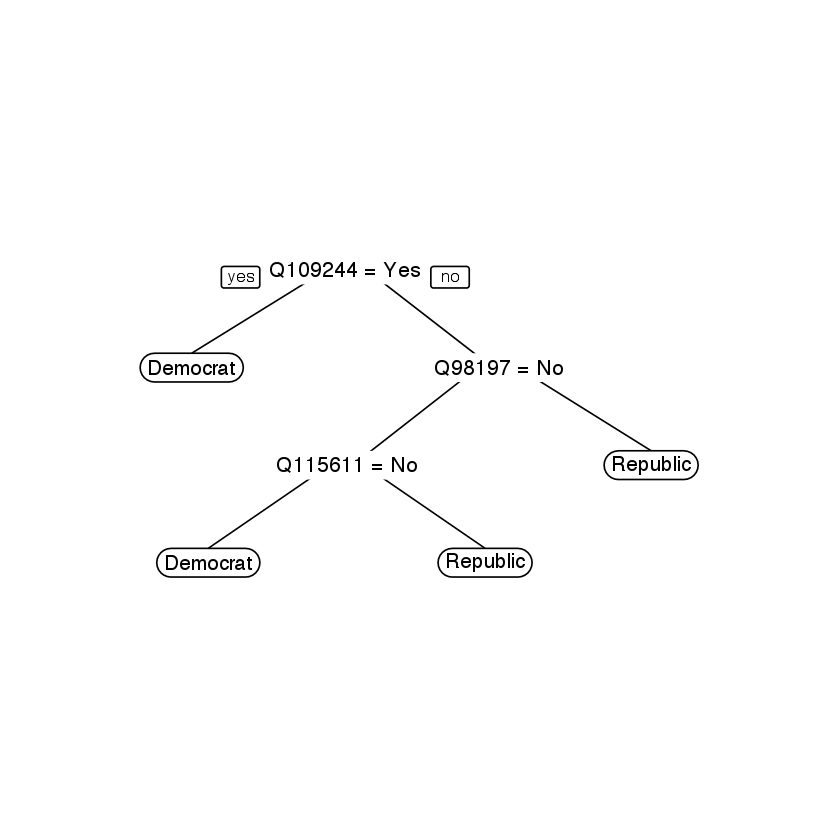

In [7]:
prp(ETree)

In [8]:
PredictCART = predict(ETree, newdata = Test, type = "class")

In [9]:
table(Test$Party, PredictCART)

            PredictCART
             Democrat Republican
  Democrat        434        182
  Republican      198        366

In [10]:
(434+366)/(434+366+182+198)

[1] 0.6779661

In [11]:
library(randomForest)

EForest = randomForest(Party ~ .-USER_ID, data = Train, nodesize = 40, ntree = 200)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [12]:
PredictForest = predict(EForest, newdata = Test)

In [13]:
table(Test$Party, PredictForest)

            PredictForest
             Democrat Republican
  Democrat        473        143
  Republican      257        307

In [14]:
(473+307)/(473+307+143+257)

[1] 0.6610169

In [60]:
Test2 = read.csv("test2.csv")

In [61]:
PredictForest2 = predict(EForest, newdata = Test2)

In [62]:
PredictForest2

1          2          3          4          5          6          7 
  Democrat Republican Republican   Democrat   Democrat   Democrat   Democrat 
         8          9         10         11         12         13         14 
Republican   Democrat   Democrat   Democrat   Democrat   Democrat Republican 
        15         16         17         18         19         20         21 
  Democrat Republican   Democrat   Democrat   Democrat Republican   Democrat 
        22         23         24         25         26         27         28 
Republican   Democrat   Democrat Republican   Democrat Republican Republican 
        29         30         31         32         33         34         35 
  Democrat Republican Republican Republican Republican   Democrat   Democrat 
        36         37         38         39         40         41         42 
  Democrat Republican Republican   Democrat   Democrat   Democrat   Democrat 
        43         44         45         46         47         48         49 
  Democrat   Democrat   Democrat Republican   Democrat   Democrat Republican 
        50         51         52         53         54         55         56 
Republican   Democrat   Democrat   Democrat   Democrat   Democrat Republican 
        57         58         59         60         61         62         63 
  Democrat   Democrat   Democrat   Democrat   Democrat   Democrat Republican 
        64         65         66         67         68         69         70 
  Democrat   Democrat Republican Republican   Democrat   Democrat   Democrat 
        71         72         73         74         75         76         77 
  Democrat Republican   Democrat   Democrat   Democrat   Democrat   Democrat 
        78         79         80         81         82         83         84 
Republican   Democrat Republican   Democrat   Democrat Republican   Democrat 
        85         86         87         88         89         90         91 
Republican   Democrat Republican   Democrat Republican Republican   Democrat 
        92         93         94         95         96         97         98 
  Democrat Republican Republican Republican   Democrat Republican   Democrat 
        99        100        101        102        103        104        105 
  Democrat   Democrat   Democrat   Democrat Republican   Democrat   Democrat 
       106        107        108        109        110        111        112 
Republican   Democrat Republican   Democrat Republican   Democrat Republican 
       113        114        115        116        117        118        119 
  Democrat   Democrat   Democrat   Democrat Republican Republican Republican 
       120        121        122        123        124        125        126 
  Democrat Republican   Democrat Republican   Democrat   Democrat   Democrat 
       127        128        129        130        131        132        133 
  Democrat   Democrat   Democrat   Democrat   Democrat Republican   Democrat 
       134        135        136        137        138        139        140 
Republican   Democrat Republican   Democrat Republican   Democrat Republican 
       141        142        143        144        145        146        147 
Republican   Democrat Republican   Democrat Republican Republican   Democrat 
       148        149        150        151        152        153        154 
  Democrat Republican   Democrat Republican   Democrat Republican Republican 
       155        156        157        158        159        160        161 
  Democrat   Democrat   Democrat   Democrat   Democrat   Democrat Republican 
       162        163        164        165        166        167        168 
  Democrat   Democrat Republican Republican Republican   Democrat   Democrat 
       169        170        171        172        173        174        175 
Republican   Democrat Republican   Democrat   Democrat   Democrat   Democrat 
       176        177        178        179        180        181        182 
  Democrat   Democrat Republica

In [63]:
MySubmission = data.frame(USER_ID = Test2$USER_ID, Predictions = PredictForest2)

In [64]:
MySubmission

,USER_ID,Predictions
1,2,Democrat
2,3,Republican
3,6,Republican
4,7,Democrat
5,14,Democrat
6,28,Democrat
7,29,Democrat
8,37,Republican
9,44,Democrat
10,56,Democrat


In [65]:
write.csv(MySubmission, "Submission4.csv", row.names=FALSE)

In [66]:
library(caret)
library(e1071)

# Number of folds
numFolds = trainControl( method = "cv", number = 10 )
cpGrid = expand.grid( .cp = seq(0.01,0.5,0.01)) 


In [67]:
tr = train(Party~.-USER_ID, data = Train, method = "rpart", trControl = tr.control, tuneGrid = cp.grid)


ERROR: Error in train.default(x, y, weights = w, ...): object 'tr.control' not found


In [ ]:
best.tree = tr$finalModel
prp(best.tree)

In [23]:
best.tree.pred = predict(best.tree, newdata=Test)

ERROR: Error in predict(best.tree, newdata = Test): object 'best.tree' not found


In [24]:
best.tree

ERROR: Error in eval(expr, envir, enclos): object 'best.tree' not found


# 交叉验证

In [25]:
numFolds = trainControl( method = "cv", number = 10 )
cpGrid = expand.grid( .cp = seq(0.01,0.02,0.001)) 


In [26]:
train(Party ~ . -USER_ID , data = Train, method = "rpart", trControl = numFolds, tuneGrid = cpGrid )


CART 

2684 samples
 107 predictor
   2 classes: 'Democrat', 'Republican' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2415, 2416, 2416, 2415, 2416, 2416, ... 
Resampling results across tuning parameters:

  cp     Accuracy  Kappa    
  0.010  0.672506  0.3423943
  0.011  0.672506  0.3423943
  0.012  0.672506  0.3423943
  0.013  0.672506  0.3423943
  0.014  0.672506  0.3423943
  0.015  0.672506  0.3423943
  0.016  0.672506  0.3423943
  0.017  0.672506  0.3423943
  0.018  0.672506  0.3423943
  0.019  0.672506  0.3423943
  0.020  0.672506  0.3423943

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was cp = 0.02. 

In [68]:
StevensTreeCV = rpart(Party~.-USER_ID, data = Train, method="class", cp = 0.015)


In [69]:
PredictCV = predict(StevensTreeCV, newdata = Test, type = "class")

In [70]:
table(Test$Party, PredictCV)

            PredictCV
             Democrat Republican
  Democrat        434        182
  Republican      198        366

In [71]:
(434+366)/(434+182+198+366)

[1] 0.6779661

In [72]:
PredictForest2 = predict(StevensTreeCV, newdata = Test2)

In [80]:
PredTest = predict(StevensTreeCV, newdata=Test2)

In [81]:
PredTest

,Democrat,Republican
1,0.778532608695652,0.221467391304348
2,0.396551724137931,0.603448275862069
3,0.336244541484716,0.663755458515284
4,0.778532608695652,0.221467391304348
5,0.605263157894737,0.394736842105263
6,0.396551724137931,0.603448275862069
7,0.778532608695652,0.221467391304348
8,0.396551724137931,0.603448275862069
9,0.778532608695652,0.221467391304348
10,0.605263157894737,0.394736842105263


In [90]:
threshold = 0.5

PredTestLabels = as.factor(ifelse(PredTest>threshold, "Democrat", "Republican"))



In [91]:
length(PredTestLabels)

[1] 2784

In [92]:
MySubmission = data.frame(USER_ID = Test2$USER_ID, Predictions = PredTestLabels)

In [93]:
MySubmission

,USER_ID,Predictions
1,2,Democrat
2,3,Republican
3,6,Republican
4,7,Democrat
5,14,Democrat
6,28,Republican
7,29,Democrat
8,37,Republican
9,44,Democrat
10,56,Democrat


In [94]:
MySubmission = MySubmission[c(1:1392),]

In [95]:
MySubmission

,USER_ID,Predictions
1,2,Democrat
2,3,Republican
3,6,Republican
4,7,Democrat
5,14,Democrat
6,28,Republican
7,29,Democrat
8,37,Republican
9,44,Democrat
10,56,Democrat


In [96]:
write.csv(MySubmission, "Submission6.csv", row.names=FALSE)

# Random Forest

In [97]:
library(randomForest)

EForest = randomForest(Party ~ .-USER_ID, data = Train, nodesize = 100, ntree = 20)

In [98]:
PredictForest = predict(EForest, newdata = Test)

In [99]:
table(Test$Party, PredictForest)

            PredictForest
             Democrat Republican
  Democrat        445        171
  Republican      229        335

In [100]:
(461+287)/(277+155+461+287)

[1] 0.6338983

In [101]:
set.seed(123)

In [102]:
EForest2 = randomForest(Party ~ .-USER_ID, data = Train, mtry = 15, importance = TRUE)

In [103]:
EForest2


Call:
 randomForest(formula = Party ~ . - USER_ID, data = Train, mtry = 15,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 15

        OOB estimate of  error rate: 32.94%
Confusion matrix:
           Democrat Republican class.error
Democrat       1014        419   0.2923936
Republican      465        786   0.3717026

In [99]:
(1033+769)/(1033+769+400+482)

[1] 0.671386

In [100]:
importance(EForest2)

,Democrat,Republican,MeanDecreaseAccuracy,MeanDecreaseGini
YOB,1.61856291012606,0.576161846648382,1.75765988969174,62.2804647395001
Gender,-0.594871688722751,3.42054656084867,2.7407611090072,10.7802346808156
Income,1.01552488222352,0.956859772451793,1.34217130087686,60.5597217615587
HouseholdStatus,2.01254286961412,-0.583619073987055,1.11533816975219,31.8293787134873
EducationLevel,-1.16425577019024,-1.92562595056845,-2.17764370166784,59.5925119325451
Q124742,1.25505277098127,0.777072387656984,1.44523124736849,10.7665322140161
Q124122,0.0814219597543826,-0.28170533753226,-0.205801547200782,10.3567843753945
Q123464,0.279056337662901,0.634184455658328,0.630496994778129,6.01001087215227
Q123621,2.35787341595481,-2.60373907521638,-0.0993381963944111,9.17662055039454
Q122769,0.996432463736732,-1.36906713660461,-0.238220709550624,10.3494925875073


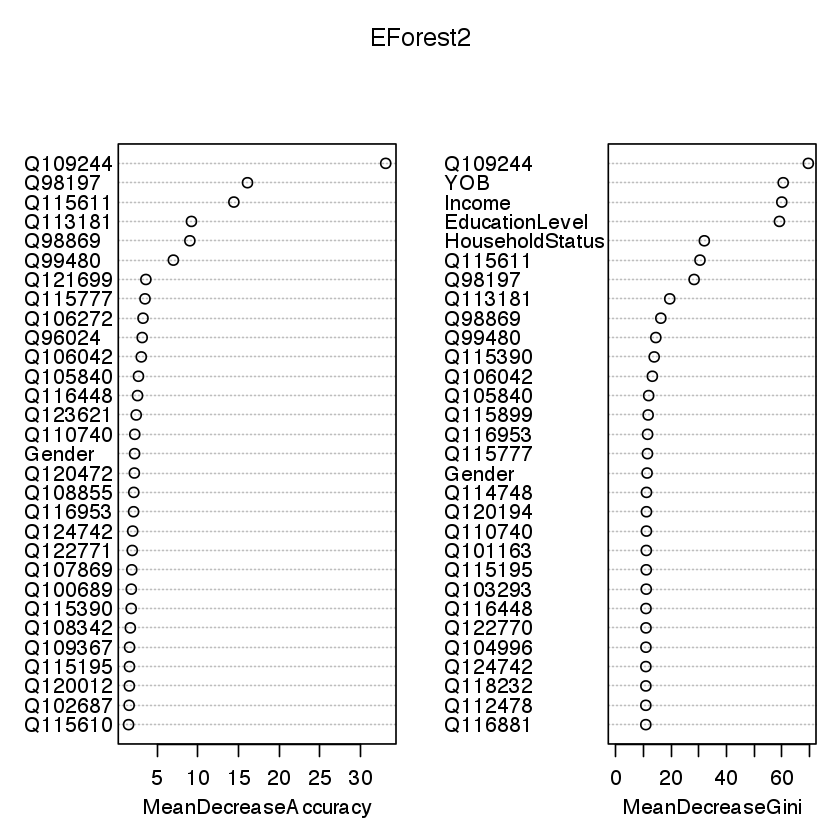

In [107]:
varImpPlot(EForest2)

In [104]:
PredictForest = predict(EForest2, newdata = Test)

In [105]:
table(Test$Party, PredictForest)

            PredictForest
             Democrat Republican
  Democrat        450        166
  Republican      216        348

In [106]:
(450+348)/(450+348+166+216)

[1] 0.6762712

In [109]:
PredTest = predict(EForest2, newdata=Test2)

In [110]:
PredTest

1          2          3          4          5          6          7 
  Democrat Republican Republican   Democrat   Democrat Republican   Democrat 
         8          9         10         11         12         13         14 
Republican   Democrat   Democrat   Democrat   Democrat   Democrat Republican 
        15         16         17         18         19         20         21 
  Democrat Republican   Democrat   Democrat   Democrat Republican   Democrat 
        22         23         24         25         26         27         28 
Republican Republican   Democrat Republican   Democrat Republican Republican 
        29         30         31         32         33         34         35 
  Democrat Republican Republican Republican Republican Republican   Democrat 
        36         37         38         39         40         41         42 
  Democrat Republican Republican   Democrat   Democrat   Democrat   Democrat 
        43         44         45         46         47         48         49 
  Democrat   Democrat   Democrat Republican   Democrat   Democrat Republican 
        50         51         52         53         54         55         56 
Republican   Democrat   Democrat   Democrat Republican   Democrat Republican 
        57         58         59         60         61         62         63 
  Democrat   Democrat   Democrat   Democrat   Democrat   Democrat Republican 
        64         65         66         67         68         69         70 
  Democrat   Democrat Republican Republican   Democrat   Democrat   Democrat 
        71         72         73         74         75         76         77 
  Democrat Republican   Democrat   Democrat Republican Republican   Democrat 
        78         79         80         81         82         83         84 
Republican   Democrat Republican   Democrat   Democrat Republican   Democrat 
        85         86         87         88         89         90         91 
Republican   Democrat Republican   Democrat Republican   Democrat   Democrat 
        92         93         94         95         96         97         98 
  Democrat Republican Republican Republican   Democrat Republican   Democrat 
        99        100        101        102        103        104        105 
  Democrat   Democrat   Democrat   Democrat Republican   Democrat   Democrat 
       106        107        108        109        110        111        112 
Republican   Democrat Republican   Democrat Republican   Democrat Republican 
       113        114        115        116        117        118        119 
  Democrat   Democrat   Democrat   Democrat Republican Republican Republican 
       120        121        122        123        124        125        126 
  Democrat Republican   Democrat Republican   Democrat   Democrat   Democrat 
       127        128        129        130        131        132        133 
  Democrat   Democrat   Democrat   Democrat   Democrat Republican   Democrat 
       134        135        136        137        138        139        140 
Republican   Democrat Republican   Democrat Republican   Democrat Republican 
       141        142        143        144        145        146        147 
Republican   Democrat Republican Republican Republican Republican   Democrat 
       148        149        150        151        152        153        154 
  Democrat Republican   Democrat Republican   Democrat Republican Republican 
       155        156        157        158        159        160        161 
  Democrat   Democrat   Democrat   Democrat   Democrat   Democrat Republican 
       162        163        164        165        166        167        168 
  Democrat   Democrat Republican Republican Republican Republican   Democrat 
       169        170        171        172        173        174        175 
Republican   Democrat Republican   Democrat   Democrat   Democrat   Democrat 
       176        177        178        179        180        181        182 
  Democrat   Democrat Republica

In [111]:
MySubmission = data.frame(USER_ID = Test2$USER_ID, Predictions = PredTest)

In [112]:
MySubmission

,USER_ID,Predictions
1,2,Democrat
2,3,Republican
3,6,Republican
4,7,Democrat
5,14,Democrat
6,28,Republican
7,29,Democrat
8,37,Republican
9,44,Democrat
10,56,Democrat


In [113]:
write.csv(MySubmission, "Submission7.csv", row.names=FALSE)

In [124]:
library(gbm)
Egbm = gbm(Party ~.-USER_ID, data = Train, distribution = "bernoulli", n.tree = 5000, interaction.depth=4)

ERROR: Error in gbm.fit(x, y, offset = offset, distribution = distribution, w = w, : Bernoulli requires the response to be in {0,1}


,var,rel.inf
Q109244,Q109244,25.8441601663834
Q98197,Q98197,9.24204489426876
Q115611,Q115611,8.30035832469879
EducationLevel,EducationLevel,3.93754186320486
Income,Income,3.2090992542281
Q98869,Q98869,3.12829554499868
Q115390,Q115390,2.9187428004586
HouseholdStatus,HouseholdStatus,2.5769807500319
YOB,YOB,2.52029823227054
Q106042,Q106042,2.46775922210222


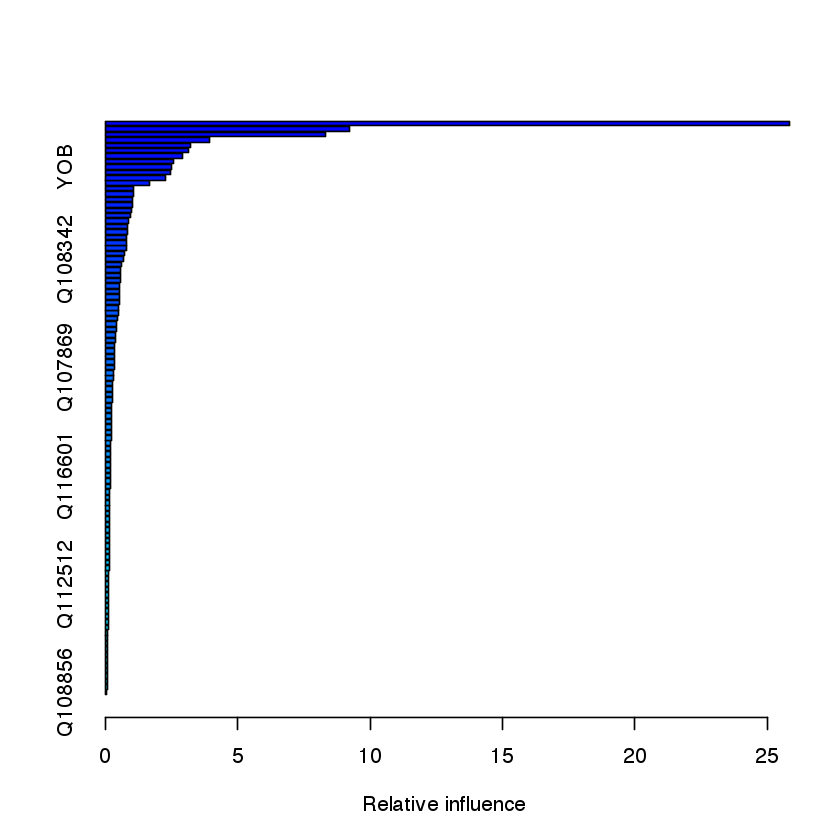

In [119]:
summary(Egbm)

In [120]:
table(Train$Party, Train$Q109244)

            
               No  Yes
  Democrat    860  573
  Republican 1088  163

In [121]:
Prediction = predict(Egbm, newdata=Test, n.trees = 5000)

In [123]:
Prediction

[1] 1.300913 1.644679 1.326580 1.420488 1.658967 1.165760 1.649631 1.554852
   [9] 1.646406 1.606466 1.566649 1.521489 1.717573 1.362178 1.771223 1.572224
  [17] 1.523643 1.257898 1.464407 1.641493 1.475676 1.410750 1.643232 1.463522
  [25] 1.745581 1.520033 1.269013 1.573566 1.223358 1.401262 1.350157 1.634329
  [33] 1.613860 1.369216 1.337425 1.173053 1.611677 1.347144 1.750317 1.473866
  [41] 1.575674 1.548486 1.437157 1.629683 1.539343 1.359966 1.131189 1.601162
  [49] 1.194058 1.642486 1.762279 1.250390 1.165930 1.702037 1.674626 1.177798
  [57] 1.265501 1.311952 1.546180 1.654869 1.674542 1.599672 1.715380 1.316603
  [65] 1.384202 1.259266 1.401735 1.124631 1.531668 1.595758 1.522745 1.328721
  [73] 1.611093 1.579415 1.314596 1.462437 1.607767 1.374453 1.553352 1.753812
  [81] 1.544503 1.547205 1.508026 1.209447 1.493336 1.646960 1.294601 1.570550
  [89] 1.366108 1.496672 1.621521 1.164187 1.168932 1.242038 1.513044 1.607191
  [97] 1.334426 1.302301 1.269802 1.569205 1.369579 1.460905 1.373187 1.236350
 [105] 1.652264 1.782714 1.772375 1.654699 1.650807 1.106236 1.623942 1.634719
 [113] 1.376424 1.672388 1.150953 1.658332 1.328484 1.573950 1.345753 1.600476
 [121] 1.492826 1.349150 1.385779 1.303846 1.141729 1.322798 1.373599 1.754365
 [129] 1.674836 1.548482 1.685627 1.576833 1.205879 1.297379 1.578240 1.679711
 [137] 1.277158 1.436001 1.594726 1.488513 1.370203 1.702563 1.606170 1.431464
 [145] 1.195912 1.193032 1.165976 1.245767 1.546350 1.359135 1.536601 1.324795
 [153] 1.665561 1.668417 1.181755 1.483885 1.449508 1.365123 1.138283 1.414095
 [161] 1.196604 1.559869 1.168944 1.754040 1.410679 1.441465 1.126432 1.531575
 [169] 1.597414 1.237043 1.391664 1.285872 1.234480 1.403838 1.523998 1.166944
 [177] 1.609233 1.626208 1.450340 1.226688 1.696849 1.208928 1.675518 1.209682
 [185] 1.740608 1.376013 1.172587 1.630674 1.253433 1.171218 1.388964 1.156949
 [193] 1.711775 1.557903 1.698035 1.637092 1.588699 1.615752 1.621288 1.423467
 [201] 1.717412 1.373464 1.319828 1.586706 1.426433 1.737857 1.404549 1.685823
 [209] 1.653469 1.416219 1.440401 1.686367 1.599221 1.661701 1.174579 1.493480
 [217] 1.133458 1.229246 1.787014 1.644506 1.443648 1.578283 1.098596 1.748929
 [225] 1.519671 1.267758 1.458152 1.572434 1.413735 1.143865 1.322009 1.589007
 [233] 1.751977 1.724207 1.586404 1.143869 1.460345 1.709275 1.207626 1.511718
 [241] 1.168028 1.147952 1.600360 1.718666 1.151499 1.315009 1.578552 1.446493
 [249] 1.757079 1.751011 1.476920 1.387223 1.521363 1.194454 1.145280 1.638447
 [257] 1.584651 1.805367 1.184936 1.556017 1.547536 1.419846 1.504800 1.594391
 [265] 1.186245 1.534274 1.710637 1.605461 1.575420 1.165224 1.440534 1.678259
 [273] 1.605484 1.508635 1.562290 1.458611 1.418262 1.679058 1.606854 1.299833
 [281] 1.590981 1.573341 1.156997 1.265419 1.231069 1.729935 1.246016 1.311735
 [289] 1.246212 1.245851 1.276351 1.218803 1.697912 1.657655 1.579424 1.256484
 [297] 1.363293 1.224094 1.615841 1.616664 1.231790 1.589590 1.585135 1.576183
 [305] 1.350347 1.505472 1.689026 1.198714 1.199423 1.516131 1.633318 1.774801
 [313] 1.353298 1.414812 1.166169 1.368733 1.226445 1.604675 1.504847 1.603520
 [321] 1.229453 1.465294 1.447634 1.525849 1.654277 1.749970 1.211588 1.602109
 [329] 1.208631 1.419128 1.366241 1.720524 1.706328 1.609548 1.399497 1.209275
 [337] 1.697801 1.544407 1.126387 1.570619 1.199364 1.496827 1.664512 1.540463
 [345] 1.294556 1.194780 1.432572 1.604300 1.403620 1.665754 1.641482 1.610018
 [353] 1.450445 1.668455 1.315241 1.289503 1.650979 1.596865 1.589666 1.463027
 [361] 1.245778 1.291734 1.430081 1.124272 1.686182 1.628352 1.570925 1.170349
 [369] 1.648014 1.170158 1.653578 1.351915 1.579371 1.575839 1.165372 1.541653
 [377] 1.713246 1.252121 1.669010 1.316439 1.271685 1.310198 1.272232 1.497609
 [385] 1.675080 1.295733 1.726115 1.320429 1.219180 1.387878 1.387688 1.295175
 [393] 1.522843 1.686953 1.405143 1.585449 1.384872 1.795139 1.726074 1.657917
 [401] 1.529630 1.126360 1.537680 1.574326 1.393869 1

# Random Forset 改进

In [114]:
library(caret)

In [115]:
ctrl = trainControl(method = "repeatedcv", number=10, repeats =10)

In [116]:
grid_rf = expand.grid(.mtry = c(2,4,8,16))

In [117]:
set.seed(300)

In [ ]:
m_rf = train(Party~.-USER_ID, data = Train, method="rf", metric = "Kappa",trControl = ctrl, tuneGrid = grid_rf)

In [ ]:
grid_c50 = expand.grid(.model = "tree", .trials = c(10, 20, 30, 40), .window = "FALSE")
